### Ejercicio 1 

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Cargamos el DataFrame

In [4]:
air_df = pd.read_csv('C:/Users/user1/Downloads/archive/DelayedFlights.csv')

#### Exploramos el DataFrame

In [5]:
air_df[:3]

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,...,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,...,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2,2008,1,3,4,628.0,620,804.0,750,WN,...,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN


In [6]:
air_df.columns

Index(['Unnamed: 0', 'Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime',
       'CRSDepTime', 'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum',
       'TailNum', 'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

#### Creamos un DataFrame sólo con las columnas relevantes

In [7]:
delay_df = air_df[['Year','Month','DayofMonth','DayOfWeek','DepTime','ArrTime', 'AirTime',
                   'DepDelay','ArrDelay','Origin','Dest','Distance']]

### Ejercicio 2

#### Resumen estadístico de las columnas de interés

In [8]:
delay_df.describe()

,Year,Month,DayofMonth,DayOfWeek,DepTime,ArrTime,AirTime,DepDelay,ArrDelay,Distance
count,1936758.0,1.936758e+06,1.936758e+06,1.936758e+06,1.936758e+06,1.929648e+06,1.928371e+06,1.936758e+06,1.928371e+06,1.936758e+06
mean,2008.0,6.111106e+00,1.575347e+01,3.984827e+00,1.518534e+03,1.610141e+03,1.082771e+02,4.318518e+01,4.219988e+01,7.656862e+02
std,0.0,3.482546e+00,8.776272e+00,1.995966e+00,4.504853e+02,5.481781e+02,6.864261e+01,5.340250e+01,5.678472e+01,5.744797e+02
min,2008.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,6.000000e+00,-1.090000e+02,1.100000e+01
25%,2008.0,3.000000e+00,8.000000e+00,2.000000e+00,1.203000e+03,1.316000e+03,5.800000e+01,1.200000e+01,9.000000e+00,3.380000e+02
50%,2008.0,6.000000e+00,1.600000e+01,4.000000e+00,1.545000e+03,1.715000e+03,9.000000e+01,2.400000e+01,2.400000e+01,6.060000e+02
75%,2008.0,9.000000e+00,2.300000e+01,6.000000e+00,1.900000e+03,2.030000e+03,1.370000e+02,5.300000e+01,5.600000e+01,9.980000e+02
max,2008.0,1.200000e+01,3.100000e+01,7.000000e+00,2.400000e+03,2.400000e+03,1.091000e+03,2.467000e+03,2.461000e+03,4.962000e+03


#### Cuántos datos faltan por columna 

In [9]:
delay_df.isnull().sum()

Year             0
Month            0
DayofMonth       0
DayOfWeek        0
DepTime          0
ArrTime       7110
AirTime       8387
DepDelay         0
ArrDelay      8387
Origin           0
Dest             0
Distance         0
dtype: int64

#### Agregamos columnas calculadas de 'velocidad media del vuelo' y 'si se ha retrasado la llegada'.

C:\Users\user1\anaconda3\lib\site-packages\numpy\lib\function_base.py:3961: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


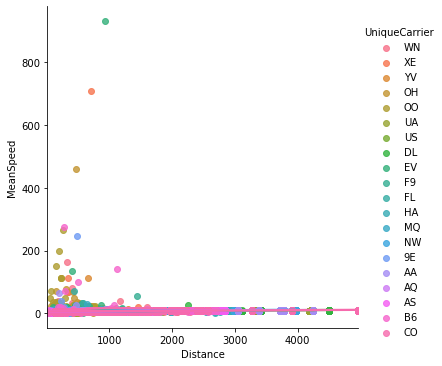

In [10]:
air_df['MeanSpeed'] = air_df['Distance']/air_df['AirTime']

# Graficamos las velocidades medias de vuelo según la distancia recorrida y la compañía
sns.lmplot(x='Distance', y='MeanSpeed', data=air_df, hue='UniqueCarrier', fit_reg=False)

In [11]:
def check_delay(time):
    if time > 0:
        return True
    else:
        return False

air_df['Delayed'] = air_df['ArrDelay'].apply(check_delay)

In [12]:
air_df[['Year','Month','DayofMonth','UniqueCarrier','FlightNum','Delayed', 'MeanSpeed']][:4]

,Year,Month,DayofMonth,UniqueCarrier,FlightNum,Delayed,MeanSpeed
0,2008,1,3,WN,335,False,6.982759
1,2008,1,3,WN,3231,True,7.168142
2,2008,1,3,WN,448,True,6.776316
3,2008,1,3,WN,3920,True,6.688312


#### Tabla de aerolíneas con más retrasos acumulados en la llegada

In [20]:
top_delays = air_df.value_counts(subset=['UniqueCarrier','Delayed'])[:5]

<AxesSubplot:xlabel='UniqueCarrier,Delayed'>

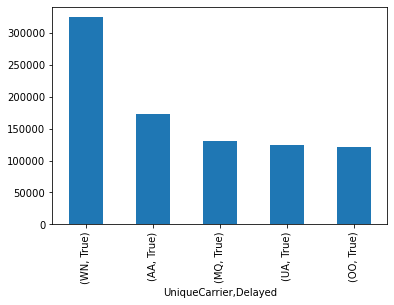

In [23]:
# Graficamos los retrasos acumulados de estas 5 aerolíneas
top_delays.plot(kind="bar")

#### Los vuelos más largos y vuelos con más retraso

In [14]:
air_df.sort_values(by='Distance', ascending=False)[:5][['Year','Month','DayofMonth','DepTime',
                                                        'Distance','UniqueCarrier','FlightNum','Origin','Dest']]

,Year,Month,DayofMonth,DepTime,Distance,UniqueCarrier,FlightNum,Origin,Dest
1255581,2008,7,18,2001.0,4962,CO,14,HNL,EWR
1926346,2008,12,20,2333.0,4962,CO,14,HNL,EWR
718062,2008,4,25,1345.0,4962,CO,15,EWR,HNL
1928077,2008,12,16,2135.0,4962,CO,14,HNL,EWR
173695,2008,1,13,1326.0,4962,CO,15,EWR,HNL


In [15]:
air_df.sort_values(by='ArrDelay', ascending=False)[:5][['Year','Month','DayofMonth','DepTime',
                                                        'ArrDelay','UniqueCarrier','FlightNum','Origin','Dest']]

,Year,Month,DayofMonth,DepTime,ArrDelay,UniqueCarrier,FlightNum,Origin,Dest
322516,2008,2,3,1117.0,2461.0,NW,808,HNL,MSP
686014,2008,4,10,724.0,2453.0,NW,1699,CLT,MSP
839306,2008,5,6,2.0,1951.0,NW,1107,RSW,DTW
1009553,2008,6,20,2140.0,1707.0,MQ,3538,LIT,DFW
1881639,2008,12,19,1602.0,1655.0,NW,357,BOS,MSP


### Ejercicio 3

#### Exportamos el DataFrame limpio y con las nuevas columnas a un archivo de Excel
<div class="alert alert-block alert-info">
    Sólo exporto las primeras 1000 filas por agilidad en la subida. Además,Excel no puede abrir en un archivo todas las filas que tiene el DataFrame y al exportar se obtiene el error:
    <b>"mValueError: This sheet is too large! Your sheet size is: 1936758, 32 Max sheet size is: 1048576, 16384"</b>
<div>

In [16]:
air_df[:1000].to_excel('air_df_clean.xlsx', sheet_name='Sheet1')